In [6]:
from __future__ import print_function
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint
import os
from keras.datasets import cifar10

In [7]:
#Descargo el Dataset para poder utilizarlo
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [8]:
#Las dimenciones del DataSet son las siguiente

#Estas son las dimenciones del DataSet de enternemiento
print(x_train.shape)     # 50000
#stas son ls dimenciones de las DataSet de evaluacion
print(x_test.shape)      # 10000

#Las imagenes estan revueltas, por lo que hay que generar un DataSet con base en las etiquetas

#Los barcos del son los etiquetados con 9
#Los camiones son los etiquetados con 8


#Aqui genero el dataset y el target de entrenamiento
trainX = []
trainY = []
for i in range(50000):
  if(y_train[i][0]==9):
    (trainX.append(x_train[i]))
    (trainY.append([0]))
  if(y_train[i][0]==8):
    (trainX.append(x_train[i]))
    (trainY.append([1]))  

#Aqui genero el dataset y el target de evaluacion
testX = []
testY = []
for i in range(10000):
  if(y_test[i][0]==9):
    (testX.append(x_test[i]))
    (testY.append([0]))
  if(y_test[i][0]==8):
    (testX.append(x_test[i]))
    (testY.append([1]))  
  

trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)




(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
#Aqui Genero el modelo que usare con sus especificaciones

input_h = 32       # height
input_w = 32       # width
input_c = 3         # number of channels
save_model = True   # flag

# Listing 5.5 Instantiating a small convnet for dogs vs. cats classification
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(input_h, input_w, input_c)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

#Se elimina esta reduccion con Respecto al codigo original debido a que las imagnes del datase son muy pequeñas
#model.add(layers.Conv2D(128, (3,3), activation="relu"))
#model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [10]:
# Listing 5.6 Configuring the model for training
model.compile(loss="binary_crossentropy",
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=["acc"])

In [11]:
#Entreno el modelo 
# Listing 5.8 Fitting the model using a batch generator

# add a callback to save the model during training
callbacks = [
        ModelCheckpoint(
            filepath="dogs_vs_cats_v1_callback.h5",
            monitor="val_loss",                         # these two arguments mean you won't overwrite the
            save_best_only=True,                        # model file unless val_loss has improved, which allows
        )                                               # you to keep the best model seen during training
    ]

model.fit(trainX, trainY, batch_size=32, epochs=10)

'''
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50,
            callbacks=callbacks,
            )
'''

Epoch 1/50
10000/10000 [==============================] - 18s 2ms/step - loss: 0.7688 - acc: 0.7609
Epoch 2/50
10000/10000 [==============================] - 15s 2ms/step - loss: 0.3661 - acc: 0.8500
Epoch 3/50
10000/10000 [==============================] - 19s 2ms/step - loss: 0.2830 - acc: 0.8848
Epoch 4/50
10000/10000 [==============================] - 19s 2ms/step - loss: 0.2339 - acc: 0.9073
Epoch 5/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.1926 - acc: 0.9234
Epoch 6/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.1632 - acc: 0.9361
Epoch 7/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.1356 - acc: 0.9467
Epoch 8/50
10000/10000 [==============================] - 14s 1ms/step - loss: 0.1082 - acc: 0.9609
Epoch 9/50
10000/10000 [==============================] - 14s 1ms/step - loss: 0.0913 - acc: 0.9647
Epoch 10/50
10000/10000 [==============================] - 14s 1ms/step - loss: 0.0737 - acc: 0.9730

'\nhistory = model.fit_generator(\n            train_generator,\n            steps_per_epoch=100,\n            epochs=30,\n            validation_data=validation_generator,\n            validation_steps=50,\n            callbacks=callbacks,\n            )\n'

In [15]:
#Aqui realizo la prediccion usando el Test de evalucion

#Utilizo el modelo desarrollado para realizar la prediccion
pre = (model.predict(testX))

predic = []
for i in range(len(pre)):
  if(pre[i]>0.5): predic.append(1)
  else: predic.append(0)


In [16]:
#Mido el accurasy con el Target real de set de evaluacion y el predecido


from sklearn.metrics import accuracy_score

Med = accuracy_score(testY, predic)

print("El acurasy del modelo entrenado es el sigueinte")
print(Med)



El acurasy del modelo entrenado es el sigueinte
0.9115


La imagen que seleccionaste es un camion
Se predice que la imagen es un camion


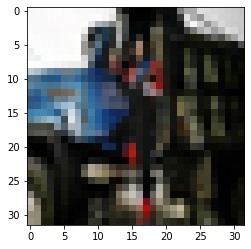

In [21]:



#Ingresa aqui el numero de imagen que quieres predecir
pos = 1000

plt.imshow(testX[pos])

if(testY[pos][0] == 0): print("La imagen que seleccionaste es un camion")
if(testY[pos][0] == 1): print("La imagen que seleccionaste es un barco")

if(predic[pos] == 0): print("Se predice que la imagen es un camion")
if(predic[pos] == 1): print("Se predice que la imagen es un barco")